KNN ALGORITHM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv('Occupancy_Estimation.csv')

X = data[['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR']]
y = data['Room_Occupancy_Count']


scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a custom range for k (odd values from 1 to 7)
k_values = range(1, 13, 2)
error_rates = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_preds = knn.predict(X_test)
    accuracy = knn.score(X_test, y_test)
    error = 1 - accuracy
    error_rates.append(error)


KNN ALGORITHM - ELBOW GRAPH

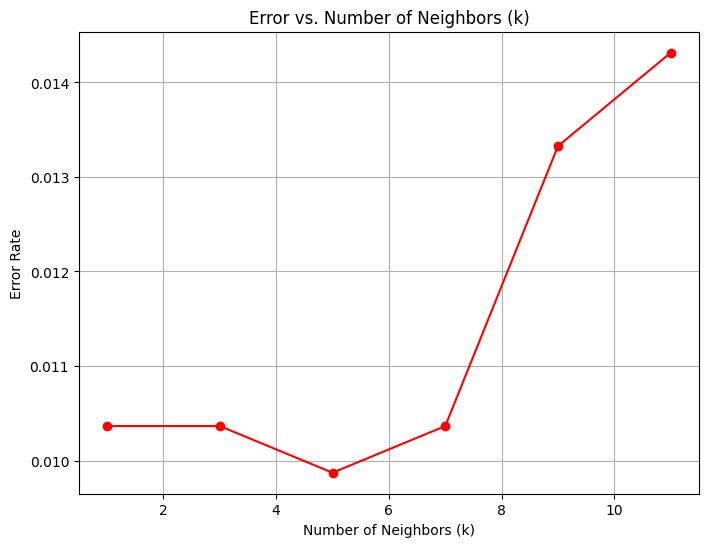

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='r')
plt.title('Error vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.show()

KNN ALGORITHM - DISTANCE VECTOR

In [5]:
param_grid = {'n_neighbors': range(1, 21)}


knn = KNeighborsClassifier()


custom_scorer = make_scorer(accuracy_score)


distance_metrics = ['euclidean', 'manhattan', 'minkowski']


optimal_ks = {}


for metric in distance_metrics:
    
    knn.set_params(metric=metric)
    
    
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring=custom_scorer)
    grid_search.fit(X_train, y_train)
    
    
    optimal_ks[metric] = grid_search.best_params_['n_neighbors']


for metric, k_value in optimal_ks.items():
    print(f'Optimal k value for {metric} distance: {k_value}')


knn_euclidean = KNeighborsClassifier(n_neighbors=optimal_ks['euclidean'], metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=optimal_ks['manhattan'], metric='manhattan')
knn_minkowski = KNeighborsClassifier(n_neighbors=optimal_ks['minkowski'], metric='minkowski')


knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)
knn_minkowski.fit(X_train, y_train)


y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)
y_pred_minkowski = knn_minkowski.predict(X_test)


error_rate_euclidean = 1 - accuracy_score(y_test, y_pred_euclidean)
error_rate_manhattan = 1 - accuracy_score(y_test, y_pred_manhattan)
error_rate_minkowski = 1 - accuracy_score(y_test, y_pred_minkowski)


print(f'Error Rate for Euclidean distance: {error_rate_euclidean}')
print(f'Error Rate for Manhattan distance: {error_rate_manhattan}')
print(f'Error Rate for Minkowski distance: {error_rate_minkowski}')

# Choose the best model based on the error rates
best_metric = min([("euclidean", error_rate_euclidean), ("manhattan", error_rate_manhattan), ("minkowski", error_rate_minkowski)], key=lambda x: x[1])
print(f'The best distance metric is {best_metric[0]} with an error rate of {best_metric[1]}')

Optimal k value for euclidean distance: 3
Optimal k value for manhattan distance: 7
Optimal k value for minkowski distance: 3
Error Rate for Euclidean distance: 0.01036525172754199
Error Rate for Manhattan distance: 0.005429417571569561
Error Rate for Minkowski distance: 0.01036525172754199
The best distance metric is manhattan with an error rate of 0.005429417571569561


NAIVE-BAYESIAN TREE

In [6]:
gnb = GaussianNB()


gnb.fit(X_train, y_train)


y_pred = gnb.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


cm = confusion_matrix(y_test, y_pred)

Accuracy: 96.69%


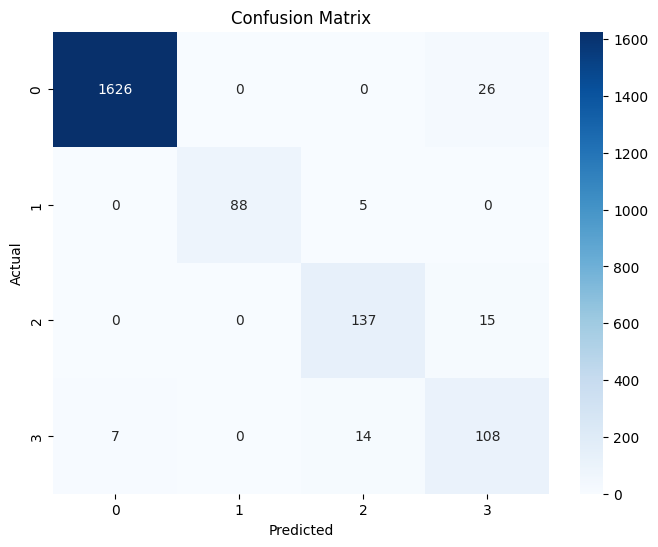

In [7]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Logistic regression

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


softmax_reg = LogisticRegression(multi_class='multinomial', solver='sag', max_iter=1000000)


param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
}


grid_search = GridSearchCV(softmax_reg, param_grid, cv=5)


grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_


y_pred = best_estimator.predict(X_test_scaled)
pd.DataFrame(confusion_matrix(y_test,y_pred))

,0,1,2,3
0,1652,0,0,0
1,0,91,2,0
2,0,1,147,4
3,2,0,5,122


In [9]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy:.7f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Best Hyperparameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.9930898
Precision: 0.99
Recall: 0.99
F1 Score: 0.99


RANDOM FOREST

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
param_grid = {
    'n_estimators': [100],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2', 1, 2, 3],  
}



rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

In [ ]:
y_pred = best_rf.predict(X_test)
accuracy = (y_pred == y_test).mean()
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.9970384995064165
